In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from scipy import optimize
from scipy import interpolate
import sympy as sy
import math as mt

In [2]:
#Construccion de las expresiones en ls diferentes coordenadas
v0 = 60 #m/s
α = np.pi
θ = np.deg2rad(45)
u = 60/2
b = 0.05
g = 9.8
s = [v0,α,θ,u,b,g]

In [3]:

def pos_x(t,v0,α,θ,u,b,g):
    x0 = u*np.cos(α)*t
    x1 = (1/b)*(v0*np.cos(θ) - u*np.cos(α))* (1-np.exp(-b*t))
    return x0+x1

In [4]:
def pos_y(t,v0,α,θ,u,b,g):
    y0 = (1/b)*((g/b)+v0*np.sin(θ)-u*np.sin(α))*(1-np.exp(-b*t))
    y1 = ((g/b)-u*np.sin(α))*t
    return y0-y1

In [5]:
#Construcción del diccionario
t = np.linspace(0,8.5,1000)
dicc = {"X":pos_x(t,*s), "Y":pos_y(t,*s),"t":t}
#Construcción del DataFrame
df = pd.DataFrame(dicc)

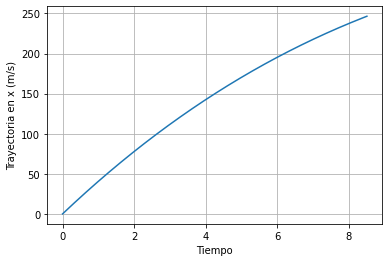

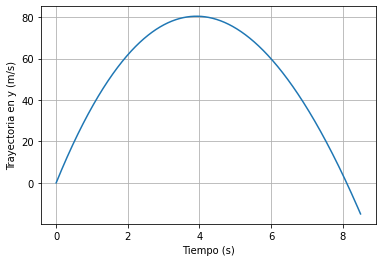

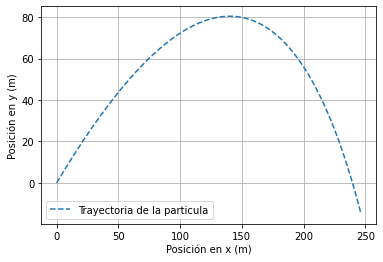

In [6]:
#Construcción de las graficas
#==================================================================
plt.figure()
plt.plot(t,df["X"])
plt.grid()
plt.xlabel("Tiempo")
plt.ylabel("Trayectoria en x (m/s)")
plt.show()
#==================================================================
plt.plot(t,df["Y"])
plt.ylabel("Trayectoria en y (m/s)")
plt.xlabel("Tiempo (s)")
plt.grid()
plt.show()
#==================================================================
plt.plot(df.X,df.Y,"--", label = "Trayectoria de la particula")
plt.grid()
plt.xlabel("Posición en x (m)")
plt.ylabel("Posición en y (m)")
plt.legend()
plt.show()

In [7]:
# Alcence máximo de la trayectoria 
#Se iguala la posición de la ecuación de la trayectoria a cero
def meto_sec(f,x0,args):
    s = optimize.newton(f,x0,args = args)
    return s
#solución de la ecuación
sol = meto_sec(pos_y,7,s)
#El alcance máximo es 
print(f"El alcance máximo que tiene la particula es de {pos_x(sol,*s):.4} metros")

El alcance máximo que tiene la particula es de 239.6 metros


In [8]:
#Variación del alcance máximo de la trayectoria en función de \theta 
#Paramatros
θ1 = np.deg2rad(np.arange(5,80,5))
R_Maxim = np.zeros(len(θ1))
for i, te in enumerate(θ1):
    s1 = (v0,α,te,u,b,g)
    tv = meto_sec(pos_y,6.5,args = s1)
    R_Maxim[i] = pos_x(tv,*s1)

In [9]:
#Interpolación de los datos
poly = interpolate.lagrange(θ1,R_Maxim)
theta = np.linspace(min(θ1),max(θ1))

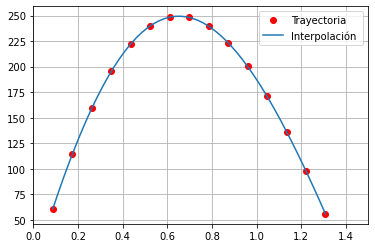

In [10]:
plt.plot(θ1,R_Maxim,"ro",label = "Trayectoria")
plt.plot(theta,poly(theta), label = "Interpolación ")
plt.grid()
plt.xlim(0,1.5)
plt.legend()

## Interpolación de Lagrange

In [11]:
#Ayuda


In [12]:
#Contrucción de la función  y su representación en Latex
def f_s (x):
    s = 1 /(1+25*x**2)
    return s
sy.init_printing() #Usa Latex para dibijar ecuaciones 
x = sy.symbols("x")
f_s(x)

In [13]:
der = sy.diff(f_s(x),x)
der2 = sy.diff(f_s(x),x,2)
der3 = sy.diff(f_s(x),x,3)

Text(0, 0.5, 'y')

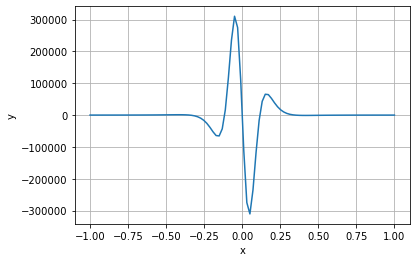

In [14]:
#Construción de la derivada de orden 5
x1 = np.linspace(-1,1,100)
der5 = sy.diff(f_s(x),x,5)
new = sy.lambdify(x,der5)
new1 = sy.lambdify(x,der)
new2 = sy.lambdify(x,der2)
#plt.plot(x1,new(x1))
#plt.plot(x1,new1(x1))
plt.plot(x1,new(x1))
plt.grid()
plt.xlabel("x")
plt.ylabel("y")

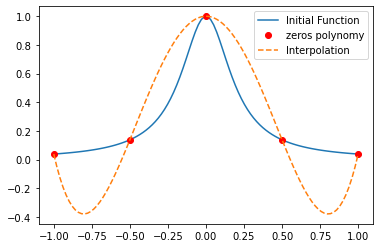

In [15]:
#Para polinomio de orden 4
x4 = np.linspace(-1,1,5)
f1 = [f_s(i) for i in x4]
#Interpolación para estos datos
#se obteitne la siguiente expresión
poly4 = interpolate.lagrange(x4,f1)
plt.plot(x1,f_s(x1),label = "Initial Function")
plt.plot(x4,f1,"ro",label = "zeros polynomy")
plt.plot(x1,poly4(x1),"--",label = "Interpolation")
plt.legend()

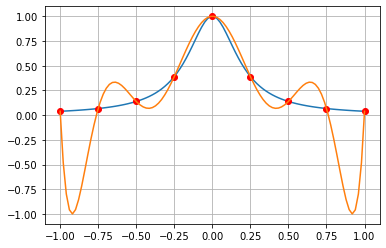

In [16]:
#Polinomio de orden 8 
x8 = np.linspace(-1,1,9)
f2 = [f_s(i) for i in x8 ]
poly8 = interpolate.lagrange(x8,f2)
plt.plot(x1,f_s(x1))
plt.plot(x8,f2,"ro")
plt.plot(x1,poly8(x1))
plt.grid()
plt.show()


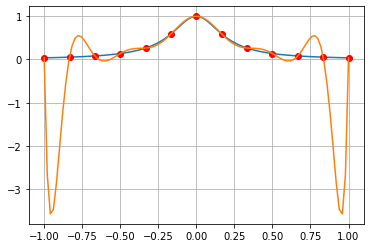

In [17]:
#Construcción del polynomio de orden 12
x12 = np.linspace(-1,1,13)
#Se cunstruye los valores de la función 
f3 = [f_s(i) for i in x12 ]
#Construcción de los interpolación
poly12 = interpolate.lagrange(x12,f3)
#La grafica de la función junto con su polinomio
plt.plot(x1,f_s(x1))
plt.plot(x12,f3,"ro")
plt.plot(x1,poly12(x1))
plt.grid()

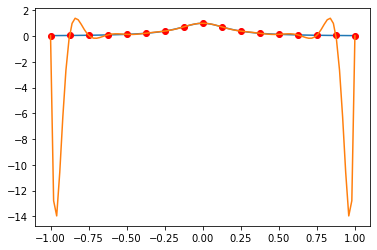

In [18]:
#Polinomio de orden 16
x16 = np.linspace(-1,1,17)
f4 = [f_s(i) for i in x16]
#Interpolación de lagrage
poly16 = interpolate.lagrange(x16,f4)
# Polynomial interpolate 
plt.plot(x1,f_s(x1))
plt.plot(x16,f4,"ro")
plt.plot(x1,poly16(x1))

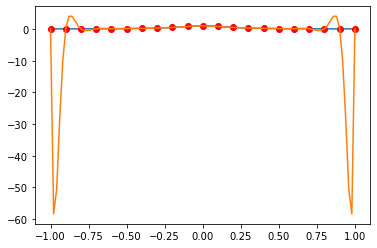

In [19]:
#Polinomio de orden 20
#Puntos del polinomio
x20 = np.linspace(-1,1,21)
f5 = [f_s(i) for i in x20]
#Contrucción de la interpolación 
poly20 = interpolate.lagrange(x20,f5)
#La contrucción de la interpolación de la función determinada
plt.plot(x1,f_s(x1))
plt.plot(x20,f5,"ro")
plt.plot(x1,poly20(x1))

## Cota del error

## la expresión para la cota del erro de lagrange

In [20]:
#Construcción de la función para hallar el error
def error(ξ,x,n):
    x2 = np.linspace(-1,1,n)
    fac = mt.factorial(n)
    mul = 1
    for i in range(len(x2)):
        mul *= (x-x2[i]) 
    return fac**(-1)*new(ξ)*mul

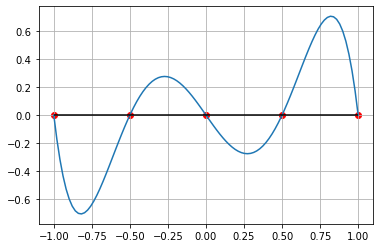

In [21]:
x3 = np.linspace(-1,1,100)
x4 = np.linspace(-1,1,5)
ξ = 0.5
err = np.array([error(ξ,x3[i],5) for i in range(len(x3))])
plt.plot(x3,err)
plt.scatter(x4,error(ξ,x4,5),color = "red")
plt.hlines(0,-1,1,color="black")
plt.grid()

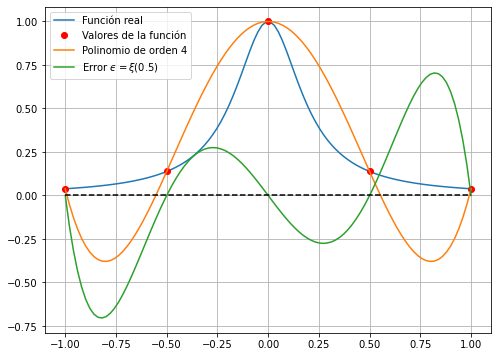

In [22]:
#Grafica del error, función real, interpolación y los valores
#Función real
plt.figure(figsize=(8,6))
plt.plot(x1,f_s(x1),label = "Función real")
#Valores de la función 
plt.plot(x4,poly4(x4),"ro",label = "Valores de la función")
#Polinomio de interpolación
plt.plot(x1,poly4(x1),label = "Polinomio de orden 4",)
plt.plot(x1,err,label = r"Error $ϵ = ξ(0.5)$")
plt.hlines(0,-1,1,colors="black",linestyles="dashed")
plt.grid()
plt.legend()

## Polinomio de hermtie

In [23]:
x1 #Puntos del polinomio
f1 #coeficientes del polinomio 

In [24]:
#Construcción de la interpolación de hermite 
def hermite(n):
    xn = np.linspace(-1,1,n+1)
    yn = [f_s(i) for i in xn]
    pnh = np.polynomial.hermite.Hermite.fit(xn,yn,n)
    return pnh,xn,yn

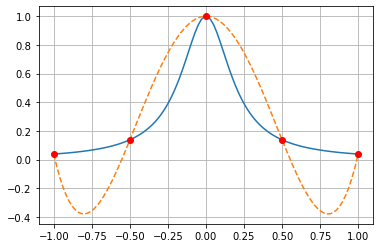

In [25]:
#Polinomio de orden 4
plt.plot(x1,f_s(x1))
plt.plot(x1,hermite(4)[0](x1),"--")
plt.plot(hermite(4)[1],hermite(4)[2],"ro")
plt.grid()

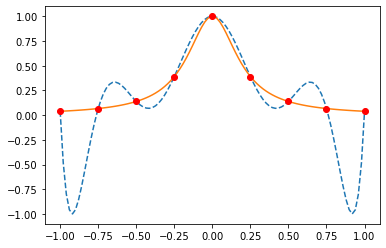

In [26]:
#Polinomio de hermite de orden 8
plt.plot(x1,hermite(8)[0](x1),"--")
plt.plot(x1,f_s(x1))
plt.plot(hermite(8)[1],hermite(8)[2],"ro")

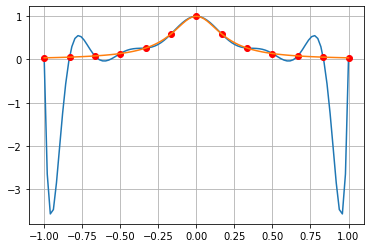

In [27]:
#Polinomio de hermite orden 12
plt.plot(x1,hermite(12)[0](x1))
plt.plot(hermite(12)[1],hermite(12)[2],"ro")
plt.plot(x1,f_s(x1))
plt.grid()

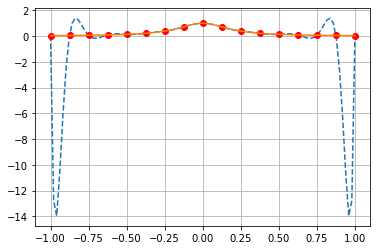

In [28]:
#polonimio de hermite de orden 16
plt.plot(x1,hermite(16)[0](x1),"--")
plt.plot(hermite(16)[1],hermite(16)[2],"ro")
plt.plot(x1,f_s(x1))
plt.grid()

/home/josecaas/anaconda3/lib/python3.9/site-packages/numpy/polynomial/hermite.py:1403: RankWarning: The fit may be poorly conditioned
  return pu._fit(hermvander, x, y, deg, rcond, full, w)
/home/josecaas/anaconda3/lib/python3.9/site-packages/numpy/polynomial/hermite.py:1403: RankWarning: The fit may be poorly conditioned
  return pu._fit(hermvander, x, y, deg, rcond, full, w)


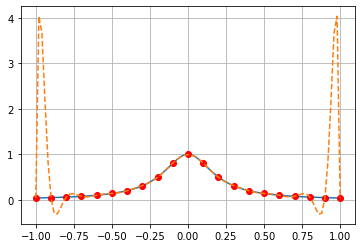

In [29]:
#Polinomio de hermite de orden 20
plt.figure()
plt.plot(x1,f_s(x1))
plt.plot(hermite(20)[1],hermite(20)[2],"ro")
plt.plot(x1,hermite(20)[0](x1),"--")
plt.grid()
plt.show()

## Error de la expresión de la interpolación de hermite

In [30]:
n = 4
dern = sy.diff(f_s(x),x,2*n +2)
dervf = sy.lambdify(x,dern)
def erro_hermi(ξ1,x,n):
    x2 = np.linspace(-1,1,n+1)
    facto = mt.factorial(2*n+2)
    mul = 1
    for i in range(len(x2)):
        mul *= np.power((x-x2[i]),2)
    return (facto**(-1))* dervf(ξ1)*mul

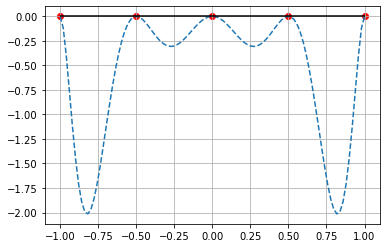

In [31]:
plt.plot(x1,erro_hermi(0.5,x1,4),"--")
plt.scatter(x4,erro_hermi(ξ,x4,4),color = "red")
plt.hlines(0,-1,1,color = "black")
plt.grid()

## Spline Cúbico

In [32]:
#importar la imagen
import cv2

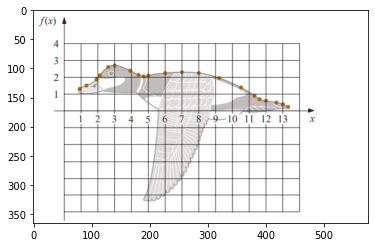

In [33]:
img = cv2.imread("/home/josecaas/Documentos/Python/Laboratorio/palomaDatos.png")
plt.imshow(img,aspect="1")

In [34]:
#construcción del data frame
x1 = [0.9,1.3,1.9,2.1,2.6,3.0,3.9,4.4,4.7,5.0,6.0,7.0,8.0,9.2,10.5,11.3,11.6,12.0,12.6,13.0,13.3]
y1 = [1.3,1.5,1.85,2.1,2.6,2.7,2.4,2.15,2.05,2.1,2.25,2.3,2.25,1.95,1.4,0.9,0.7,0.6,0.5,0.4,0.25]
dicc1 = {"X":x1,"Y":y1}
df1 = pd.DataFrame(dicc1)

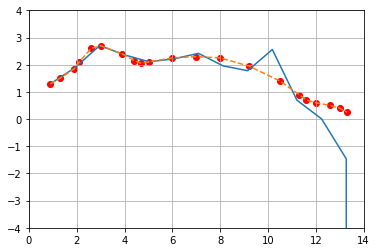

In [35]:
## Construcción del polonimio de lagrange
x_3 = np.linspace(df1["X"].min(),df1["X"].max()+1,14)
poli_ima = interpolate.lagrange(df1["X"],df1["Y"])
plt.plot(x_3,poli_ima(x_3))
plt.scatter(df1["X"],df1["Y"], color = "red")
plt.plot(df1["X"],df1["Y"],"--")
plt.xlim(0,14)
plt.ylim(-4,4)
plt.grid()

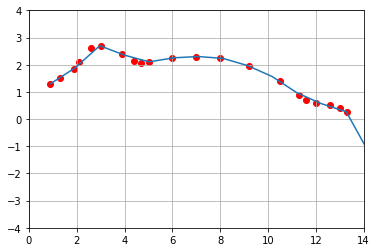

In [39]:
inter_cubi = interpolate.CubicSpline(df1["X"],df1["Y"])
plt.scatter(df1["X"],df1["Y"], color = "red")
plt.plot(x_3,inter_cubi(x_3))
plt.xlim(0,14)
plt.ylim(-4,4)
plt.grid()
plt.savefig("Intepolación.jpg")